<a href="https://colab.research.google.com/github/Welison-Mattedi/MVP-teste/blob/main/MVP_An%C3%A1lise_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP An√°lise de Dados e Boas Pr√°ticas

**Nome:** Welison Mattedi

**Matr√≠cula:** 4052025000152

**Dataset:** used_cars_UK (https://www.kaggle.com/datasets/muhammadawaistayyab/used-cars-prices-in-uk/data)

**---OBSERVA√á√ïES IMPORTANTES---**

 Encorajamos voc√™ a usar a estrutura base deste Notebook para a constru√ß√£o das suas an√°lises, j√° que ela contempla grande parte das sugest√µes do checklist no enunciado do MVP. Contudo, vale ressaltar que √© necess√°rio realizar mais etapas e an√°lises, al√©m das apresentadas neste notebook. √â fundamental ter profundidade nas discuss√µes e an√°lises propostas, construindo um storytelling cativante que explore os principais conceitos e t√©cnicas vistos nas aulas de An√°lise de Dados e Boas Pr√°ticas.

 **------**

# Descri√ß√£o do Problema
O conjunto de dados deste dataset √© uma cole√ß√£o abrangente de informa√ß√µes automotivas extra√≠das de um site de venda de ve√≠culos automotivo, autotrader.co.uk.
Este conjunto de dados compreende 3.685 carros seminovos √† venda, cada um representando um an√∫ncio de ve√≠culo exclusivo, e inclui treze atributos distintos que fornecem insights valiosos sobre o mundo automobil√≠stico.


## Hip√≥teses do Problema

As hip√≥teses que tracei s√£o as seguintes:

- As diferentes esp√©cies de √çris podem ser distinguidas com base nas medi√ß√µes de suas s√©palas e p√©talas?

- Existe uma correla√ß√£o entre comprimento da p√©tala e largura da p√©tala?

- A esp√©cie Iris setosa √© mais facilmente separ√°vel das outras duas esp√©cies?

## Tipo de Problema


Este √© um problema de **classifica√ß√£o supervisionada**, pois o aprendizado supervisionado, o modelo aprende a partir de exemplos rotulados, ou seja, o conjunto de dados possui uma vari√°vel alvo conhecida, que o modelo tenta prever com base nas vari√°veis de entrada, no caso as caracteristicas dos carros como quilometragem rodada, ano de fabrica√ß√£o, consumo de combustivel, etc.




## Sele√ß√£o de Dados

O dataset Carros_Usados √© um conjunto de dados amplamente dispon√≠vel e frequentemente inclu√≠do em bibliotecas de aprendizado de m√°quina, como *scikit-learn* no Python. N√£o √© necess√°ria uma etapa de sele√ß√£o de dados externa, pois o dataset j√° est√° curado e pronto para uso.

## Atributos do Dataset

O dataset *used_cars_UK* cont√©m 3.685 carros seminovos √† venda, cada um representando um an√∫ncio de ve√≠culo exclusivo, e inclui treze atributos distintos que s√£o:


*   Title-----------------------------------Nome
*   Price----------------------------------Libras (¬£)
*   Mileage(miles)------------------Quilometragem (milhas)
*   Registration(year)--------------Ano de emplacamento
*   Previous Owners----------------Propriet√°rios anteriores
*   Fuel Type---------------------------Tipo de combust√≠vel
*   Body Type--------------------------Tipo de carroceria
*   Engine--------------------------------Motor (capacidade de cilindrada (L)
*   Gearbox-----------------------------Tipo de c√¢mbio (manual ou autom√°tico)
*   Seats---------------------------------N√∫mero de ocupantes
*   Doors---------------------------------N√∫mero de portas
*   Emission Class------------------Classes de emiss√£o de CO2, como as normas Euro (Euro 1, 2, 3, 4, 5, 6)
*   Service history-------------------Hit√≥rico de manuten√ß√µes

Fuel type, Body type, Engine, Gearbox, Emission Class:s√£o caracter√≠sticas t√©cnicas do carros.


















#Hip√≥tesis sobre o problema

Vari√°veis	S√£o suficientes para explicar o pre√ßo
Qualidade dos dados	Est√£o corretos, consistentes e foram tratados
Representatividade	O conjunto reflete o mercado real
Tempo	O comportamento do mercado n√£o mudou drasticamente
R√≥tulo	O limite de ¬£5.000 √© adequado para definir ‚Äúpre√ßo alto‚Äù
Independ√™ncia	Cada registro representa um carro √∫nico
Generaliza√ß√£o	Novos dados seguem a mesma distribui√ß√£o dos dados de treino



# Importa√ß√£o das Bibliotecas Necess√°rias e Carga de Dados

Esta se√ß√£o consolida todas as importa√ß√µes de bibliotecas necess√°rias para a an√°lise, visualiza√ß√£o e pr√©-processamento dos dados.

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.datasets import load_star_dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Carros_Usados.csv to Carros_Usados.csv
User uploaded file "Carros_Usados.csv" with length 364255 bytes


In [4]:
dataset = pd.read_csv('Carros_Usados.csv')

In [114]:
# Exibir as primeiras linhas do DataFrame
print(dataset.head())

            Title  Price  Mileage(miles)  Registration_Year  Previous Owners  \
0     SKODA Fabia   6900           70189               2016              3.0   
1  Vauxhall Corsa   1495           88585               2008              4.0   
2     Hyundai i30    949          137000               2011              NaN   
3      MINI Hatch   2395           96731               2010              5.0   
4  Vauxhall Corsa   1000           85000               2013              NaN   

  Fuel type  Body type Engine Gearbox  Doors  Seats Emission Class  \
0    Diesel  Hatchback   1.4L  Manual    5.0    5.0         Euro 6   
1    Petrol  Hatchback   1.2L  Manual    3.0    5.0         Euro 4   
2    Petrol  Hatchback   1.4L  Manual    5.0    5.0         Euro 5   
3    Petrol  Hatchback   1.4L  Manual    3.0    4.0         Euro 4   
4    Diesel  Hatchback   1.3L  Manual    5.0    5.0         Euro 5   

  Service history  Preco_Alto  
0             NaN           1  
1            Full           0  
2 

In [6]:
# verificando que 'Carros_Usados' √© um dataframe
type(dataset)

pandas.core.frame.DataFrame

In [ ]:
# verificando os tipos de cada coluna do dataframe
dataset.dtypes

Title                 object
Price                  int64
Mileage(miles)         int64
Registration_Year      int64
Previous Owners      float64
Fuel type             object
Body type             object
Engine                object
Gearbox               object
Doors                float64
Seats                float64
Emission Class        object
Service history       object
dtype: object

In [ ]:
# exibindo as dimens√µes do dataset
dataset.shape

(3685, 13)

In [ ]:
#exibir o nome das colunas
dataset.columns

Index(['Title', 'Price', 'Mileage(miles)', 'Registration_Year',
       'Previous Owners', 'Fuel type', 'Body type', 'Engine', 'Gearbox',
       'Doors', 'Seats', 'Emission Class', 'Service history'],
      dtype='object')

In [ ]:
# exibir as primeiras linhas
dataset.head()


Title  Price  Mileage(miles)  Registration_Year  Previous Owners  \
0     SKODA Fabia   6900           70189               2016              3.0   
1  Vauxhall Corsa   1495           88585               2008              4.0   
2     Hyundai i30    949          137000               2011              NaN   
3      MINI Hatch   2395           96731               2010              5.0   
4  Vauxhall Corsa   1000           85000               2013              NaN   

  Fuel type  Body type Engine Gearbox  Doors  Seats Emission Class  \
0    Diesel  Hatchback   1.4L  Manual    5.0    5.0         Euro 6   
1    Petrol  Hatchback   1.2L  Manual    3.0    5.0         Euro 4   
2    Petrol  Hatchback   1.4L  Manual    5.0    5.0         Euro 5   
3    Petrol  Hatchback   1.4L  Manual    3.0    4.0         Euro 4   
4    Diesel  Hatchback   1.3L  Manual    5.0    5.0         Euro 5   

  Service history  
0             NaN  
1            Full  
2             NaN  
3            Full  
4             NaN

In [ ]:
# exibir um sumario estat√≠stico
dataset.describe()


Price  Mileage(miles)  Registration_Year  Previous Owners  \
count   3685.000000    3.685000e+03        3685.000000      2276.000000   
mean    5787.145726    8.132816e+04        2011.835007         2.807557   
std     4480.810572    3.942083e+04           5.092566         1.546028   
min      400.000000    1.000000e+00        1953.000000         1.000000   
25%     2490.000000    5.698400e+04        2008.000000         2.000000   
50%     4000.000000    8.000000e+04        2012.000000         3.000000   
75%     7995.000000    1.030000e+05        2015.000000         4.000000   
max    33900.000000    1.110100e+06        2023.000000         9.000000   

             Doors        Seats  
count  3660.000000  3650.000000  
mean      4.321038     4.900274  
std       0.986902     0.577200  
min       2.000000     2.000000  
25%       3.000000     5.000000  
50%       5.000000     5.000000  
75%       5.000000     5.000000  
max       5.000000     7.000000

# An√°lise de Dados

Nesta etapa de An√°lise de Dados Explorat√≥ria (EDA) sobre o dataset Iris, visamos entender a distribui√ß√£o, as rela√ß√µes e as caracter√≠sticas das vari√°veis, o que √© crucial para as etapas subsequentes de pr√©-processamento e modelagem.

O dataset Colunas com valores ausentes:

Previous Owners: ~38% ausentes

Engine: 45 ausentes

Doors: 25 ausentes

Seats: 35 ausentes

Emission Class: 87 ausentes

Service history: ~85% ausentes

## Total e Tipo das Inst√¢ncias

O dataset possui 3685 linhas e 13 colunas apresentando dados e caracter√≠sticas de ve√≠culos seminovos.

In [ ]:
print(f"Total de inst√¢ncias: {len(dataset)}")
print("\nTipos de dados por coluna:")
print(dataset.info())

Total de inst√¢ncias: 3685

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3685 entries, 0 to 3684
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              3685 non-null   object 
 1   Price              3685 non-null   int64  
 2   Mileage(miles)     3685 non-null   int64  
 3   Registration_Year  3685 non-null   int64  
 4   Previous Owners    2276 non-null   float64
 5   Fuel type          3685 non-null   object 
 6   Body type          3685 non-null   object 
 7   Engine             3640 non-null   object 
 8   Gearbox            3685 non-null   object 
 9   Doors              3660 non-null   float64
 10  Seats              3650 non-null   float64
 11  Emission Class     3598 non-null   object 
 12  Service history    540 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 374.4+ KB
None


In [ ]:
# exibindo a quantidade de linhas por coluna
dataset.count()

Title                3685
Price                3685
Mileage(miles)       3685
Registration_Year    3685
Previous Owners      2276
Fuel type            3685
Body type            3685
Engine               3640
Gearbox              3685
Doors                3660
Seats                3650
Emission Class       3598
Service history       540
dtype: int64

In [ ]:
# exibindo um sum√°rio estat√≠stico
dataset.describe()

Price  Mileage(miles)  Registration_Year  Previous Owners  \
count   3685.000000    3.685000e+03        3685.000000      2276.000000   
mean    5787.145726    8.132816e+04        2011.835007         2.807557   
std     4480.810572    3.942083e+04           5.092566         1.546028   
min      400.000000    1.000000e+00        1953.000000         1.000000   
25%     2490.000000    5.698400e+04        2008.000000         2.000000   
50%     4000.000000    8.000000e+04        2012.000000         3.000000   
75%     7995.000000    1.030000e+05        2015.000000         4.000000   
max    33900.000000    1.110100e+06        2023.000000         9.000000   

             Doors        Seats  
count  3660.000000  3650.000000  
mean      4.321038     4.900274  
std       0.986902     0.577200  
min       2.000000     2.000000  
25%       3.000000     5.000000  
50%       5.000000     5.000000  
75%       5.000000     5.000000  
max       5.000000     7.000000

In [ ]:
# ordenando o dataframe por uma coluna
#coluna Radius em ordem crescente
dataset.sort_values(by='Price')

Title  Price  Mileage(miles)  Registration_Year  \
3243                    SEAT Ibiza    400          120842               2010   
3276                Vauxhall Astra    450          115000               2005   
1236                Vauxhall Astra    495           97000               2011   
3244                   Ford Fiesta    499          111875               2007   
3240                  Renault Clio    500          138061               2007   
...                            ...    ...             ...                ...   
3100                    SEAT Ateca  25995             222               2023   
3228  Land Rover Range Rover Sport  25995           36363               2015   
3222                 BMW X3 Series  28240           45155               2019   
2934  Land Rover Range Rover Sport  30000           46000               2017   
3210       Mercedes-Benz GLE Class  33900           92000               2019   

      Previous Owners Fuel type  Body type Engine    Gearbox  Doors  Seats  \
3243              4.0    Diesel  Hatchback   1.2L     Manual    3.0    5.0   
3276              NaN    Diesel  Hatchback   1.7L     Manual    5.0    5.0   
1236              7.0    Diesel  Hatchback   1.7L     Manual    5.0    5.0   
3244              4.0    Petrol  Hatchback   1.4L     Manual    3.0    5.0   
3240              5.0    Petrol  Hatchback   1.4L     Manual    3.0    5.0   
...               ...       ...        ...    ...        ...    ...    ...   
3100              NaN    Petrol        SUV   1.5L     Manual    5.0    5.0   
3228              NaN    Diesel        SUV   3.0L  Automatic    5.0    5.0   
3222              1.0    Diesel        SUV   2.0L  Automatic    5.0    5.0   
2934              2.0    Diesel        SUV   2.0L  Automatic    5.0    5.0   
3210              1.0    Diesel        SUV   2.0L  Automatic    5.0    5.0   

     Emission Class Service history  
3243         Euro 5             NaN  
3276         Euro 4             NaN  
1236         Euro 5             NaN  
3244         Euro 4             NaN  
3240         Euro 4             NaN  
...             ...             ...  
3100         Euro 6             NaN  
3228         Euro 5             NaN  
3222         Euro 6             NaN  
2934         Euro 6             NaN  
3210         Euro 6             NaN  

[3685 rows x 13 columns]

In [ ]:
# selecionando uma coluna espec√≠fica
dataset['Title']

0          SKODA Fabia
1       Vauxhall Corsa
2          Hyundai i30
3           MINI Hatch
4       Vauxhall Corsa
             ...      
3680    Renault Megane
3681           Audi A4
3682      BMW 3 Series
3683      Honda Accord
3684    Vauxhall Corsa
Name: Title, Length: 3685, dtype: object

In [ ]:
# selecionando um subconjunto de colunas para todas as linhas
dataset.loc[:, ['Title', 'Price', ]]


Title  Price
0        SKODA Fabia   6900
1     Vauxhall Corsa   1495
2        Hyundai i30    949
3         MINI Hatch   2395
4     Vauxhall Corsa   1000
...              ...    ...
3680  Renault Megane   1395
3681         Audi A4   6990
3682    BMW 3 Series   3995
3683    Honda Accord   1390
3684  Vauxhall Corsa   2000

[3685 rows x 2 columns]

## selecionando um subconjunto de colunas para todas as linhas
Aqui selecionamos a coluna *Previous Owners*

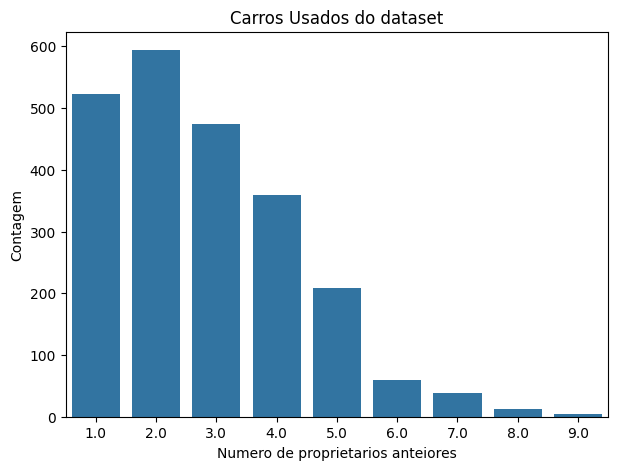

In [115]:
plt.figure(figsize=(7, 5))
# gr√°fico de barras simples
sns.countplot(x='Previous Owners', data=dataset)
plt.title('Carros Usados do dataset')
plt.xlabel('Numero de proprietarios anteiores')
plt.ylabel('Contagem')
plt.show()

Pelo gr√°fico de barras, podemos observar que a maioria dos carros j√° teve mais de 2 propriet√°rios.

## Estat√≠sticas Descritivas

Estat√≠sticas descritivas fornecem um resumo das caracter√≠sticas num√©ricas, incluindo m√©dia, desvio padr√£o, m√≠nimo, m√°ximo e quartis.

In [ ]:
# estat√≠sticas descritivas b√°sicas do dataset
dataset.describe()

Price  Mileage(miles)  Registration_Year  Previous Owners  \
count   3685.000000    3.685000e+03        3685.000000      2276.000000   
mean    5787.145726    8.132816e+04        2011.835007         2.807557   
std     4480.810572    3.942083e+04           5.092566         1.546028   
min      400.000000    1.000000e+00        1953.000000         1.000000   
25%     2490.000000    5.698400e+04        2008.000000         2.000000   
50%     4000.000000    8.000000e+04        2012.000000         3.000000   
75%     7995.000000    1.030000e+05        2015.000000         4.000000   
max    33900.000000    1.110100e+06        2023.000000         9.000000   

             Doors        Seats  
count  3660.000000  3650.000000  
mean      4.321038     4.900274  
std       0.986902     0.577200  
min       2.000000     2.000000  
25%       3.000000     5.000000  
50%       5.000000     5.000000  
75%       5.000000     5.000000  
max       5.000000     7.000000

### M√©dia

A m√©dia √© uma medida de tend√™ncia central que representa o valor t√≠pico ou o ponto de equil√≠brio de um conjunto de dados. √â calculada somando-se todos os valores e dividindo-se pelo n√∫mero total de observa√ß√µes. √â sens√≠vel a valores extremos (outliers).

In [ ]:
# m√©dia dos atributos num√©ricos do dataset
dataset.describe().loc['mean']

Price                 5787.145726
Mileage(miles)       81328.164722
Registration_Year     2011.835007
Previous Owners          2.807557
Doors                    4.321038
Seats                    4.900274
Name: mean, dtype: float64

In [ ]:
# Qual gr√°fico seria interessante usar pra mostrar a m√©dia?

### Desvio Padr√£o

O desvio padr√£o √© uma medida de dispers√£o que quantifica a quantidade de varia√ß√£o ou dispers√£o de um conjunto de valores. Um desvio padr√£o baixo indica que os pontos de dados tendem a estar pr√≥ximos da m√©dia do conjunto, enquanto um desvio padr√£o alto indica que os pontos de dados est√£o espalhados por uma faixa maior de valores. Ele √© a raiz quadrada da vari√¢ncia.

In [ ]:
# desvio padr√£o dos atributos num√©ricos do dataset
dataset.describe().loc['std']

Price                 4480.810572
Mileage(miles)       39420.833595
Registration_Year        5.092566
Previous Owners          1.546028
Doors                    0.986902
Seats                    0.577200
Name: std, dtype: float64

In [ ]:
# Qual gr√°fico seria interessante usar pra mostrar o desvio padr√£o?

## Histograma

A distribui√ß√£o de dados descreve como os valores de uma vari√°vel se espalham, ou seja, a frequ√™ncia com que diferentes valores ocorrem. Entender a distribui√ß√£o √© crucial na an√°lise de dados, pois revela padr√µes, tend√™ncias centrais, dispers√£o e a presen√ßa de valores at√≠picos (outliers). O histograma √© uma ferramenta visual fundamental para representar essa distribui√ß√£o, mostrando a forma dos dados, se s√£o sim√©tricos ou assim√©tricos, unimodais ou multimodais.

### *sepal length*

Alguma curiosidade ou fato importante sobre o atributo que estamos olhando a distribui√ß√£o?

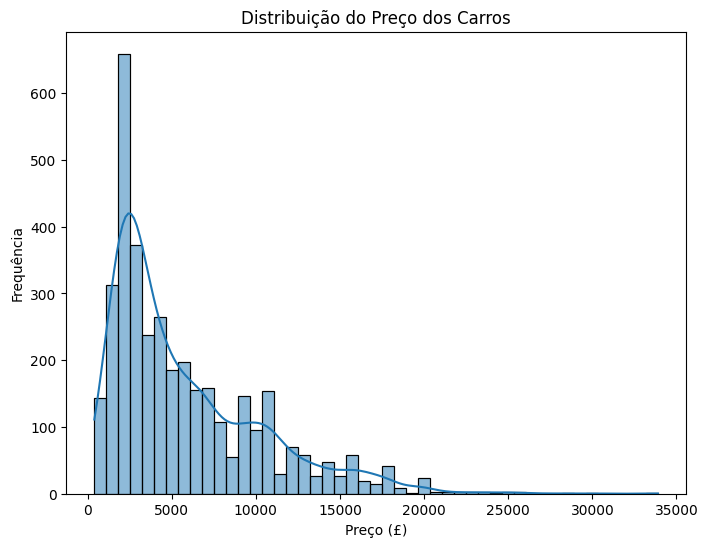

In [ ]:
plt.figure(figsize=(8, 6))
# Histograma do comprimento da s√©pala (um dos atributos)
sns.histplot(dataset['Price'], kde=True)
plt.title('Distribui√ß√£o do Pre√ßo dos Carros')
plt.xlabel('Pre√ßo (¬£)')
plt.ylabel('Frequ√™ncia')
plt.show()

O histograma mostra a distribui√ß√£o do comprimento da s√©pala. A curva de densidade estimada (KDE) nos indica que a distribui√ß√£o parece bimodal ou multimodal, indicando que as esp√©cies podem ter comprimentos de s√©palas diferentes.

### *sepal width*

Alguma curiosidade ou fato importante sobre o atributo que estamos olhando a distribui√ß√£o?

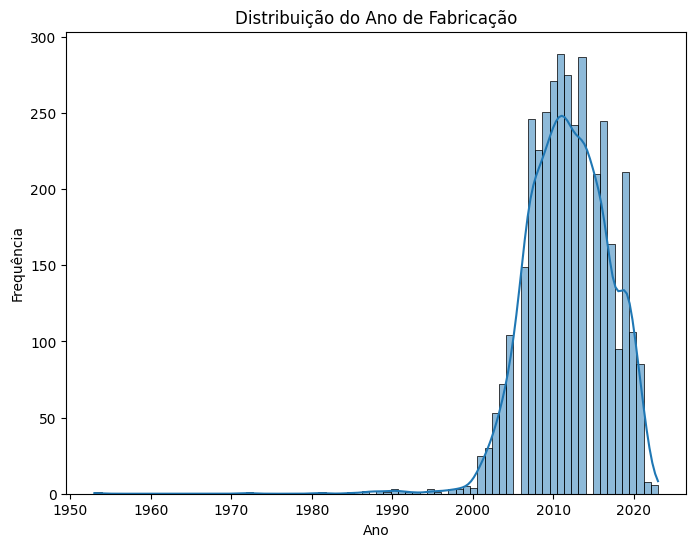

In [ ]:
plt.figure(figsize=(8, 6))
# Histograma do comprimento da s√©pala (um dos atributos)
sns.histplot(dataset['Registration_Year'], kde=True)
plt.title('Distribui√ß√£o do Ano de Fabrica√ß√£o')
plt.xlabel('Ano')
plt.ylabel('Frequ√™ncia')
plt.show()

Quais impress√µes voc√™ tem sobre a distribui√ß√£o do atributo 'sepal width'?

## Boxplot

Para entender as diferen√ßas entre as esp√©cies, devemos olhar como se comportam os valores quando agrupadas por esp√©cie. Isso nos permite comparar a m√©dia, mediana e desvio padr√£o de cada caracter√≠stica para Iris setosa, Iris versicolor e Iris virginica, al√©m de visualizar suas distribui√ß√µes por meio de boxplots.


In [ ]:
# Estat√≠sticas descritivas agrupadas por esp√©cie
dataset.groupby('Mileage(miles)').describe()

Price                                                           \
               count     mean         std      min      25%      50%      75%   
Mileage(miles)                                                                  
1                2.0  18440.0  106.066017  18365.0  18402.5  18440.0  18477.5   
6                1.0  15500.0         NaN  15500.0  15500.0  15500.0  15500.0   
222              1.0  25995.0         NaN  25995.0  25995.0  25995.0  25995.0   
1048             1.0  21495.0         NaN  21495.0  21495.0  21495.0  21495.0   
4000             1.0  18499.0         NaN  18499.0  18499.0  18499.0  18499.0   
...              ...      ...         ...      ...      ...      ...      ...   
208000           1.0   1995.0         NaN   1995.0   1995.0   1995.0   1995.0   
225318           1.0    750.0         NaN    750.0    750.0    750.0    750.0   
234680           1.0   2600.0         NaN   2600.0   2600.0   2600.0   2600.0   
274100           7.0    795.0    0.000000    795.0    795.0    795.0    795.0   
1110100          1.0   2495.0         NaN   2495.0   2495.0   2495.0   2495.0   

                        Registration_Year          ... Doors      Seats       \
                    max             count    mean  ...   75%  max count mean   
Mileage(miles)                                     ...                         
1               18515.0               2.0  2023.0  ...   5.0  5.0   2.0  5.0   
6               15500.0               1.0  2004.0  ...   4.0  4.0   1.0  5.0   
222             25995.0               1.0  2023.0  ...   5.0  5.0   1.0  5.0   
1048            21495.0               1.0  2023.0  ...   5.0  5.0   1.0  5.0   
4000            18499.0               1.0  2021.0  ...   5.0  5.0   1.0  5.0   
...                 ...               ...     ...  ...   ...  ...   ...  ...   
208000           1995.0               1.0  2009.0  ...   2.0  2.0   1.0  4.0   
225318            750.0               1.0  1989.0  ...   5.0  5.0   0.0  NaN   
234680           2600.0               1.0  2011.0  ...   5.0  5.0   1.0  5.0   
274100            795.0               7.0  2004.0  ...   5.0  5.0   7.0  5.0   
1110100          2495.0               1.0  2003.0  ...   3.0  3.0   1.0  4.0   

                                              
                std  min  25%  50%  75%  max  
Mileage(miles)                                
1               0.0  5.0  5.0  5.0  5.0  5.0  
6               NaN  5.0  5.0  5.0  5.0  5.0  
222             NaN  5.0  5.0  5.0  5.0  5.0  
1048            NaN  5.0  5.0  5.0  5.0  5.0  
4000            NaN  5.0  5.0  5.0  5.0  5.0  
...             ...  ...  ...  ...  ...  ...  
208000          NaN  4.0  4.0  4.0  4.0  4.0  
225318          NaN  NaN  NaN  NaN  NaN  NaN  
234680          NaN  5.0  5.0  5.0  5.0  5.0  
274100          0.0  5.0  5.0  5.0  5.0  5.0  
1110100         NaN  4.0  4.0  4.0  4.0  4.0  

[1570 rows x 40 columns]

### *petal length* por Esp√©cie


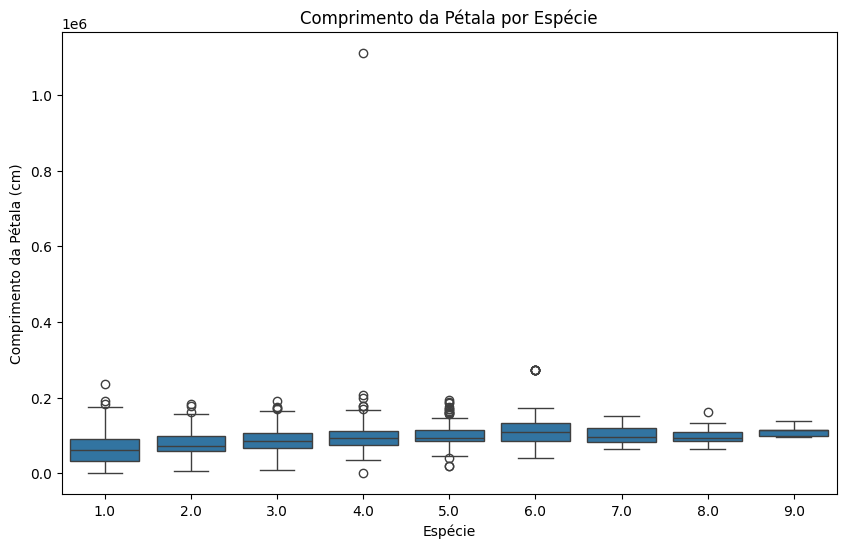

In [ ]:
# Boxplot do comprimento da p√©tala por esp√©cie
plt.figure(figsize=(10, 6))
sns.boxplot(x='Previous Owners', y='Mileage(miles)', data=dataset)
plt.title('Comprimento da P√©tala por Esp√©cie')
plt.xlabel('Esp√©cie')
plt.ylabel('Comprimento da P√©tala (cm)')
plt.show()

O boxplot do comprimento da p√©tala por esp√©cie demonstra claramente que a Iris setosa tem p√©talas significativamente mais curtas do que as outras duas esp√©cies. H√° uma sobreposi√ß√£o entre Iris versicolor e Iris virginica, mas as medianas e as caixas indicam uma distin√ß√£o.

### *petal width* por Esp√©cie

In [ ]:
# Boxplot do comprimento da p√©tala por esp√©cie
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='petal width (cm)', data=df)
plt.title('Largura da P√©tala por Esp√©cie')
plt.xlabel('Esp√©cie')
plt.ylabel('Largura da P√©tala (cm)')
plt.show()

Quais impress√µes o boxplot trouxe?

## Matriz de Correla√ß√£o

A matriz de correla√ß√£o mede a for√ßa e a dire√ß√£o de uma rela√ß√£o linear que os atributos num√©ricos das esp√©cies podem ter. Valores pr√≥ximos a 1 indicam uma forte correla√ß√£o positiva, -1 uma forte correla√ß√£o negativa, e 0 aus√™ncia de correla√ß√£o linear.

O m√©todo corr() funciona apenas com dados num√©ricos. No seu conjunto de dados DataFrame, a primeira coluna ('Title') cont√©m nomes de carros, que s√£o strings.

numeric_cols = ['Pre√ßo', 'Quilometragem(milhas)', 'Ano_de_Registro', 'Propriet√°rios Anteriores', 'Portas', 'Assentos']: Esta linha cria uma lista chamada numeric_cols contendo os nomes das colunas no seu DataFrame que possuem dados num√©ricos.
dataset[numerical_cols]: Seleciona apenas as colunas listadas em numeric_cols do conjunto de dados DataFrame.
.corr(): Este m√©todo √© aplicado √†s colunas num√©ricas selecionadas e calcula a correla√ß√£o entre pares entre cada par de colunas. O resultado √© uma matriz de correla√ß√£o.
print("\nMatriz de Correla√ß√£o:"): Esta linha imprime um cabe√ßalho antes de exibir a matriz de correla√ß√£o.
print(...): Esta linha imprime a matriz de correla√ß√£o calculada no console.
A matriz de correla√ß√£o mostra a intensidade da rela√ß√£o linear entre cada par de vari√°veis ‚Äã‚Äãnum√©ricas. Os valores variam de -1 a 1, onde:

1 indica uma correla√ß√£o linear positiva perfeita.
-1 indica uma correla√ß√£o linear negativa perfeita.
0 indica que n√£o h√° correla√ß√£o linear.

In [11]:
# Matriz de correla√ß√£o
print("\nMatriz de Correla√ß√£o:")
numerical_cols = ['Price', 'Mileage(miles)', 'Registration_Year', 'Previous Owners', 'Doors', 'Seats']
print(dataset[numerical_cols].corr())


Matriz de Correla√ß√£o:
                      Price  Mileage(miles)  Registration_Year  \
Price              1.000000       -0.500158           0.723880   
Mileage(miles)    -0.500158        1.000000          -0.417029   
Registration_Year  0.723880       -0.417029           1.000000   
Previous Owners   -0.479424        0.316160          -0.501045   
Doors              0.113352       -0.037042           0.217475   
Seats             -0.027406        0.095287           0.037120   

                   Previous Owners     Doors     Seats  
Price                    -0.479424  0.113352 -0.027406  
Mileage(miles)            0.316160 -0.037042  0.095287  
Registration_Year        -0.501045  0.217475  0.037120  
Previous Owners           1.000000 -0.153262 -0.029338  
Doors                    -0.153262  1.000000  0.497163  
Seats                    -0.029338  0.497163  1.000000  


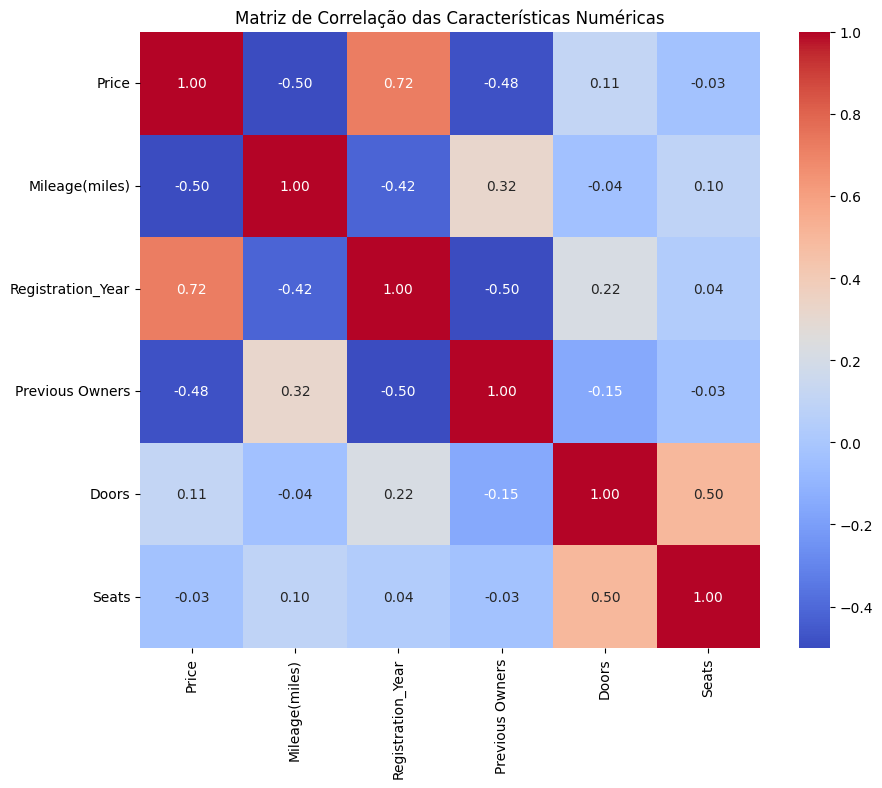

In [7]:
plt.figure(figsize=(10, 8))
# mapa de calor das vari√°veis num√©ricas
numerical_cols = ['Price', 'Mileage(miles)', 'Registration_Year', 'Previous Owners', 'Doors', 'Seats']
sns.heatmap(dataset[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correla√ß√£o das Caracter√≠sticas Num√©ricas')
plt.show()

O mapa de calor da matriz de correla√ß√£o revela fortes correla√ß√µes positivas entre *petal length* e *petal width*, bem como entre *sepal length* e *petal length*/*petal width*. Isso sugere que essas caracter√≠sticas se movem juntas, o que √© √∫til para a sele√ß√£o de caracter√≠sticas.

# Pr√©-Processamento de Dados

O pr√©-processamento de dados √© uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo, melhorando a qualidade e o desempenho. Na etapa de pr√©-processamento pode ser feito a limpeza de dados, remo√ß√£o ou corre√ß√£o de dados faltantes (valores nulos ou NaN), tratamento de  valores fora do padr√£o esperado (outliers), corre√ß√£o de inconsist√™ncias (dados duplicados ou conflitantes), transforma√ß√£o de dados, normaliza√ß√£o ou padroniza√ß√£o de vari√°veis num√©ricas (min-max scaling, z-score), convers√£o de vari√°veis categ√≥ricas em n√∫meros (one-hot encoding), cria√ß√£o de novas vari√°veis, entre outros.


Para um conjunto de treino e teste utilizaremos a coluna Doors

In [13]:
# Separar features (X) e target (y)
X = dataset.drop('Doors', axis=1)
y = dataset['Doors']

In [14]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

ValueError: Input y contains NaN.

Ao dividir os dados da coluna Doors em treino e teste, a execu√ß√£o retornou erro, pois os dados da coluna Doors possui valores ausentes NaN.
Assim ser√° necess√°rio remover os valores faltantes e em seguida dividir os dados em treino e teste.

In [21]:
# Check for missing values in the 'Doors' column
print("Missing values in 'Doors' column before handling:")
print(dataset['Doors'].isnull().sum())


Missing values in 'Doors' column before handling:
25


In [22]:
# Drop rows with missing values in the 'Doors' column
dataset_cleaned = dataset.dropna(subset=['Doors'])

In [23]:
# Separate features (X) and target (y) from the cleaned dataset
X_cleaned = dataset_cleaned.drop('Doors', axis=1)
y_cleaned = dataset_cleaned['Doors']

In [24]:
# Check for missing values in 'Doors' column after handling
print("\nMissing values in 'Doors' column after handling:")
print(y_cleaned.isnull().sum())


Missing values in 'Doors' column after handling:
0


In [25]:
# Split the cleaned data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.3, random_state=42, stratify=y_cleaned)

In [26]:
print(f"Dimens√µes de X_train: {X_train.shape}")
print(f"Dimens√µes de X_test: {X_test.shape}")
print(f"Dimens√µes de y_train: {y_train.shape}")
print(f"Dimens√µes de y_test: {y_test.shape}")

Dimens√µes de X_train: (2562, 12)
Dimens√µes de X_test: (1098, 12)
Dimens√µes de y_train: (2562,)
Dimens√µes de y_test: (1098,)


## Normaliza√ß√£o

A normaliza√ß√£o escala os dados para um intervalo fixo, geralmente entre 0 e 1. √â √∫til quando o algoritmo de machine learning assume que as caracter√≠sticas est√£o em uma escala semelhante.
A principal raz√£o para aplicar normaliza√ß√£o √© garantir que as vari√°veis num√©ricas estejam em uma escala semelhante.
Para normaliza√ß√£o dos dados, utilizamos a fun√ß√£o MinMaxScaler.

Ao aplicar a normaliza√ß√£o no conjunto de teste, encontramos um erro, pois a fun√ß√£o est√° sendo aplicado aos dados X_train, que ainda cont√™m colunas n√£o num√©ricas, como 'Title', mas a fun√ß√£o s√≥ pode processar dados num√©ricos.

In [35]:
# Inicializar o MinMaxScaler
scaler_norm = MinMaxScaler()

In [39]:
# Aprende min e max APENAS de X_train
scaler_norm.fit(X_train)
X_train_normalized = scaler_norm.transform(X_train)
# Usa a m√©dia e o desvio padr√£o aprendidos de X_train
X_test_normalized = scaler_norm.transform(X_test)

ValueError: could not convert string to float: 'Fiat 500'

Para isso,precisamos aplicar o *MinMaxScale*r apenas √†s colunas num√©ricas do conjunto de dados.
Assim utilizaremos a fun√ß√£o *ColumnTransformer* do *scikit-learn*, que permite aplicar diferentes transforma√ß√µes a diferentes colunas.

In [41]:
# Identify numerical and categorical columns
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Create a column transformer to apply MinMaxScaler to numerical features
# and pass through categorical features (or apply other transformations like OneHotEncoder)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('cat', 'passthrough', categorical_features) # Keep categorical columns as they are for now
    ])


In [46]:
# Apply the column transformer to the training and testing data
X_train_normalized = preprocessor.fit_transform(X_train)
X_test_normalized = preprocessor.transform(X_test)

print("Data processed successfully!")
print(f"Dimens√µes de X_train_processed: {X_train_normalized.shape}")
print(f"Dimens√µes de X_test_processed: {X_test_normalized.shape}")

Data processed successfully!
Dimens√µes de X_train_processed: (2562, 12)
Dimens√µes de X_test_processed: (1098, 12)


In [53]:
# Exibir as colunas ap√≥s a normaliza√ß√£o
print(df_normalized.columns)

Index(['Title', 'Price', 'Mileage(miles)', 'Registration_Year',
       'Previous Owners', 'Fuel type', 'Body type', 'Engine', 'Gearbox',
       'Seats', 'Emission Class', 'Service history'],
      dtype='object')


In [47]:
# Exibir as primeiras linhas dos dados normalizados (como DataFrame para melhor visualiza√ß√£o)
df_normalized = pd.DataFrame(X_train_normalized, columns=X_train.columns)

In [48]:
print("\nPrimeiras 5 linhas dos dados normalizados (treino):")
print(df_normalized.head())


Primeiras 5 linhas dos dados normalizados (treino):
      Title     Price Mileage(miles) Registration_Year Previous Owners  \
0  0.195516  0.116742       0.885714               NaN             0.4   
1  0.195516  0.291862       0.828571               NaN             0.6   
2  0.068759  0.113094       0.571429               0.0             0.6   
3  0.086697  0.453059       0.814286               NaN             0.6   
4  0.074738   0.24188       0.814286              0.25             0.6   

         Fuel type Body type     Engine Gearbox      Seats Emission Class  \
0         Fiat 500    Petrol  Hatchback    0.9L     Manual         Euro 6   
1     SKODA Superb    Petrol  Hatchback    1.8L  Automatic         Euro 5   
2  Volkswagen Polo    Petrol      Coupe    1.0L     Manual         Euro 1   
3     BMW 3 Series    Diesel     Saloon    2.0L  Automatic         Euro 5   
4      Hyundai i20    Petrol  Hatchback    1.4L     Manual         Euro 4   

  Service history  
0             NaN  

O histograma de *Price* ap√≥s a normaliza√ß√£o mostra que os valores foram escalados para o intervalo de 0 a 1, mantendo a forma da distribui√ß√£o original.

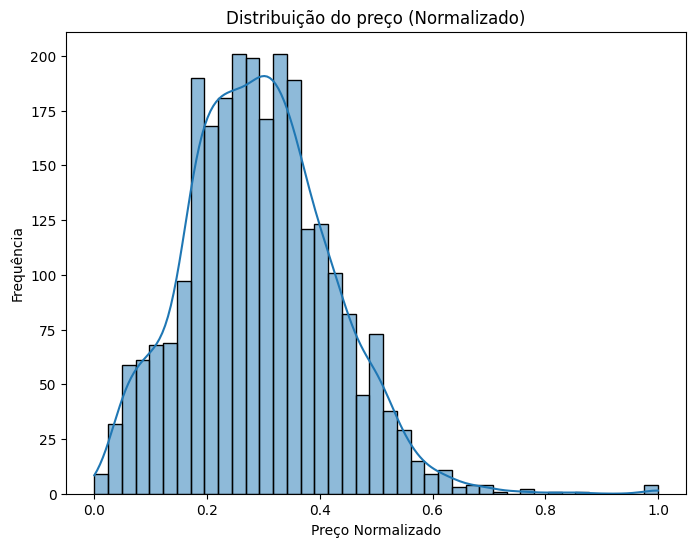

In [76]:
# Visualiza√ß√£o da distribui√ß√£o ap√≥s a normaliza√ß√£o (exemplo para uma caracter√≠stica)
plt.figure(figsize=(8, 6))
sns.histplot(df_normalized['Price'], kde=True)
plt.title('Distribui√ß√£o do pre√ßo (Normalizado)')
plt.xlabel('Pre√ßo Normalizado')
plt.ylabel('Frequ√™ncia')
plt.show()

## Padroniza√ß√£o

A padroniza√ß√£o (ou Z-score scaling) transforma os dados para ter m√©dia 0 e desvio padr√£o 1. √â √∫til para algoritmos que s√£o sens√≠veis √† escala das caracter√≠sticas, como SVMs ou redes neurais.

In [77]:
# Inicializar o StandardScaler
scaler_std = StandardScaler()

In [80]:
# Apply the column transformer to the training and testing data using StandardScaler
preprocessor_std = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', 'passthrough', categorical_features) # Keep categorical columns as they are for now
    ])

X_train_standardized = preprocessor_std.fit_transform(X_train)
X_test_standardized = preprocessor_std.transform(X_test)

print("Data standardized successfully!")
print(f"Dimens√µes de X_train_standardized: {X_train_standardized.shape}")
print(f"Dimens√µes de X_test_standardized: {X_test_standardized.shape}")

Data standardized successfully!
Dimens√µes de X_train_standardized: (2562, 12)
Dimens√µes de X_test_standardized: (1098, 12)


In [81]:
# Exibir as primeiras linhas dos dados padronizados (como DataFrame para melhor visualiza√ß√£o)
df_standardized = pd.DataFrame(X_train_standardized, columns=X_train.columns)

In [82]:
print("\nPrimeiras 5 linhas dos dados padronizados (treino):")
print(df_standardized.head())


Primeiras 5 linhas dos dados padronizados (treino):
      Title     Price Mileage(miles) Registration_Year Previous Owners  \
0   0.25404 -1.367088       0.610367               NaN       -1.592401   
1   0.25404 -0.010794      -0.162146               NaN        0.181113   
2 -0.684173 -1.395345      -3.638454         -1.158811        0.181113   
3 -0.551407  1.237675      -0.355275               NaN        0.181113   
4 -0.639918 -0.397903      -0.355275          0.130887        0.181113   

         Fuel type Body type     Engine Gearbox      Seats Emission Class  \
0         Fiat 500    Petrol  Hatchback    0.9L     Manual         Euro 6   
1     SKODA Superb    Petrol  Hatchback    1.8L  Automatic         Euro 5   
2  Volkswagen Polo    Petrol      Coupe    1.0L     Manual         Euro 1   
3     BMW 3 Series    Diesel     Saloon    2.0L  Automatic         Euro 5   
4      Hyundai i20    Petrol  Hatchback    1.4L     Manual         Euro 4   

  Service history  
0             NaN  

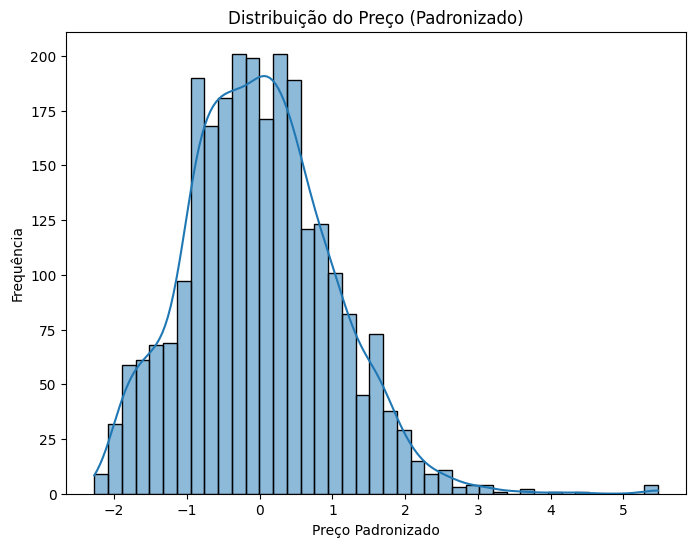

In [91]:
# Visualiza√ß√£o da distribui√ß√£o ap√≥s a padroniza√ß√£o (exemplo para uma caracter√≠stica)
plt.figure(figsize=(8, 6))
sns.histplot(df_standardized['Price'], kde=True)
plt.title('Distribui√ß√£o do Pre√ßo (Padronizado)')
plt.xlabel('Pre√ßo Padronizado')
plt.ylabel('Frequ√™ncia')
plt.show()

O histograma de *Price* ap√≥s a padroniza√ß√£o mostra que os valores foram transformados para ter uma m√©dia pr√≥xima de zero e um desvio padr√£o de um, centralizando a distribui√ß√£o.

## Tratamento de Valores Nulos

O dataset Iris original n√£o possui valores nulos. No entanto, o tratamento de valores nulos √© crucial e pode envolver imputa√ß√£o (preenchimento com m√©dia, mediana, moda) ou remo√ß√£o de linhas/colunas.

In [94]:
# Verificar a presen√ßa de valores nulos no dataset original
print("Valores nulos no dataset Carros_Usados:")
dataset.isnull().sum()

Valores nulos no dataset Carros_Usados:


Title                   0
Price                   0
Mileage(miles)          0
Registration_Year       0
Previous Owners      1409
Fuel type               0
Body type               0
Engine                 45
Gearbox                 0
Doors                  25
Seats                  35
Emission Class         87
Service history      3145
dtype: int64

## Outras Transforma√ß√µes e Etapas de Pr√©-Processamento

Outras etapas de pr√©-processamento incluem a sele√ß√£o de caracter√≠sticas, redu√ß√£o de dimensionalidade (como PCA) ou cria√ß√£o de novas caracter√≠sticas (feature engineering). O que voc√™ faria a mais?



# Conclus√£o

A an√°lise e pr√©-processamento do dataset Iris demonstram a import√¢ncia de entender a estrutura dos dados antes da modelagem. O dataset √© limpo e balanceado, com caracter√≠sticas num√©ricas bem definidas que permitem uma clara separa√ß√£o entre as esp√©cies, especialmente a Iris setosa. A an√°lise explorat√≥ria revelou correla√ß√µes importantes entre as caracter√≠sticas e a efic√°cia de visualiza√ß√µes como boxplots para distinguir as classes. As etapas de normaliza√ß√£o e padroniza√ß√£o s√£o fundamentais para preparar os dados para diversos algoritmos de aprendizado de m√°quina, garantindo que o modelo possa aprender eficientemente com as rela√ß√µes presentes nos dados.

As tr√™s hip√≥teses levantadas foram validadas:

1.   *As diferentes esp√©cies de √çris podem ser distinguidas com base nas medi√ß√µes de suas s√©palas e p√©talas?* Sim, dado as an√°lises que fizemos no boxplot, observamos um comportamento muito claro e distinto.

2.   *Existe uma correla√ß√£o entre comprimento da p√©tala e largura da p√©tala?* Existe forte correla√ß√£o entre os atributos *petal length* e *petal width*.

3.   *A esp√©cie Iris setosa √© mais facilmente separ√°vel das outras duas esp√©cies?* Sim, devido √†s suas caracter√≠sticas distintas de menor comprimento e largura da p√©tala.

In [98]:
# Criar vari√°vel alvo: 1 se pre√ßo > 5000, sen√£o 0
dataset['Preco_Alto'] = (dataset['Price'] > 5000).astype(int)

# Separar vari√°veis independentes e dependente
X = dataset.drop(columns=['Price', 'Preco_Alto'])
y = dataset['Preco_Alto']

In [100]:
# Identificar colunas num√©ricas e categ√≥ricas
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = X.select_dtypes(include='object').columns.tolist()

In [103]:
# Pipeline para colunas num√©ricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [107]:
# Pipeline para colunas categ√≥ricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [108]:
# Combinando os transformadores
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)


In [113]:
from sklearn.metrics import classification_report

# === 3. Modelo de Machine Learning ===
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Divis√£o em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinamento
model.fit(X_train, y_train)

# Avalia√ß√£o
y_pred = model.predict(X_test)
print("üìã Relat√≥rio de Classifica√ß√£o:\n")
print(classification_report(y_test, y_pred))

üìã Relat√≥rio de Classifica√ß√£o:

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       661
           1       0.91      0.90      0.90       445

    accuracy                           0.92      1106
   macro avg       0.92      0.92      0.92      1106
weighted avg       0.92      0.92      0.92      1106



In [95]:
import streamlit as st
import pandas as pd
import numpy as np
import joblib
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Carrega os dados e prepara o pipeline
@st.cache_data
def load_data_and_model():
    df = pd.read_csv("Carros_Usados.csv")
    df['Preco_Alto'] = (df['Price'] > 5000).astype(int)

    X = df.drop(columns=['Price', 'Preco_Alto'])
    y = df['Preco_Alto']

    numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
    categorical_cols = X.select_dtypes(include='object').columns.tolist()

    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer([
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

    model = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=1000))
    ])

    model.fit(X, y)
    return model, X, numeric_cols, categorical_cols

model, X, numeric_cols, categorical_cols = load_data_and_model()

st.title("üîç Previs√£o de Pre√ßo Alto para Carros Usados")
st.markdown("Preencha os campos abaixo para prever se o pre√ßo estimado ser√° acima de ¬£5.000")

# Interface din√¢mica com base nas colunas
user_input = {}

for col in numeric_cols:
    min_val = float(X[col].min())
    max_val = float(X[col].max())
    default_val = float(X[col].mean())
    user_input[col] = st.slider(f"{col}", min_val, max_val, default_val)

for col in categorical_cols:
    options = list(X[col].dropna().unique())
    user_input[col] = st.selectbox(f"{col}", options)

# Transformar entrada em DataFrame
input_df = pd.DataFrame([user_input])

# Fazer a previs√£o
if st.button("Prever Pre√ßo"):
    prediction = model.predict(input_df)[0]
    prob = model.predict_proba(input_df)[0][prediction]
    resultado = "üü¢ Acima de ¬£5.000" if prediction == 1 else "üî¥ ¬£5.000 ou menos"
    st.markdown(f"## Resultado: {resultado}")
    st.markdown(f"Probabilidade: **{prob * 100:.2f}%**")

ModuleNotFoundError: No module named 'streamlit'